In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

tf.__version__

'2.3.1'

In [2]:
# Load 2019 new york airbnb data in Pandas

ny_airbnb = pd.read_csv('AB_NYC_2019.csv')
ny_airbnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [3]:
# Data preparation: drop the uneeded columns and fill none-value with 0

ny_airbnb.drop(['host_name', 'id', 'host_id', 'last_review'], axis = 'columns', inplace=True)
ny_airbnb['reviews_per_month'] = ny_airbnb['reviews_per_month'].fillna(0)

ny_airbnb.head(2)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [4]:
# Tranform catagorical data into numerical data

catagorical_features = ny_airbnb.select_dtypes(include=['object'])
ny_airbnb_one_hot = pd.get_dummies(catagorical_features)
ny_airbnb_one_hot.head(2)

,name_ 1 Bed Apt in Utopic Williamsburg,name_ 2-3 bedroom UWS garden triplex,name_ 3 bedroom loft in Williamsburg,name_ A charming Space in Brooklyn,name_ AMAZING TIME SQUARE!!BRICK WALLS!!,name_ Affordable & Cozy,name_ Beautiful Room In Gramercy!!!,name_ Family Friendly Brooklyn House,name_ Heart & Soul of Greenwich Village,"name_ Private 1 bdrm Lefferts Gr, BK apt",...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Normalize data using Max-Min function

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(ny_airbnb_one_hot[ny_airbnb_one_hot.columns[ny_airbnb_one_hot.columns.str.contains('price')==False]])

In [5]:
# Validation

x_train, x_test, y_train, y_test = train_test_split(ny_airbnb_one_hot[ny_airbnb_one_hot.columns[ny_airbnb_one_hot.columns.str.contains('price')==False]], ny_airbnb['price'], test_size=0.1, random_state=42)

In [11]:
# DNN Model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(64,activation=tf.nn.relu),
    tf.keras.layers.Dense(32,activation=tf.nn.relu),
    tf.keras.layers.Dense(16,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.relu)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

history = model.fit(x_train.values, y_train.values, epochs = 5, validation_split = 0.1)

Epoch 1/5
1238/1238 [==============================] - 159s 129ms/step - loss: 46644.3008 - mean_squared_error: 46644.3008 - val_loss: 109057.1094 - val_mean_squared_error: 109057.1094
Epoch 2/5
1238/1238 [==============================] - 168s 136ms/step - loss: 41856.9531 - mean_squared_error: 41856.9531 - val_loss: 109126.9375 - val_mean_squared_error: 109126.9375
Epoch 3/5
1238/1238 [==============================] - 159s 128ms/step - loss: 34873.6602 - mean_squared_error: 34873.6602 - val_loss: 109256.9375 - val_mean_squared_error: 109256.9375
Epoch 4/5
1238/1238 [==============================] - 153s 124ms/step - loss: 27897.1934 - mean_squared_error: 27897.1934 - val_loss: 109706.9609 - val_mean_squared_error: 109706.9609
Epoch 5/5
1238/1238 [==============================] - 132s 107ms/step - loss: 20648.0000 - mean_squared_error: 20648.0000 - val_loss: 114591.3047 - val_mean_squared_error: 114591.3047


In [13]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

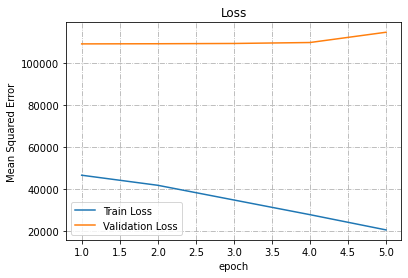

In [18]:
import matplotlib.pyplot as plt
ax = plt.gca()
plt.title('Loss')
k = list(range(1, len(history.history['loss'])+1))
plt.plot(k, history.history['loss'], label='Train Loss')
plt.plot(k, history.history['val_loss'], label='Validation Loss')
ax.grid(linestyle='-.')
plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')

plt.legend()
plt.show()